In [2]:
from pytqs import tqs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib.ticker import PercentFormatter
from sklearn import neighbors
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn import metrics
import time
from sklearn.linear_model import LogisticRegression
import operator
import math
import pickle

In [103]:
pd.read_csv('/home/tiger/定级测试/logistic_model_validate.csv')

,Unnamed: 0,A0_V_correct_rate,A1L_V_correct_rate,A1M_V_correct_rate,A1H_V_correct_rate,A2L_V_correct_rate,A2M_V_correct_rate,A2H_V_correct_rate,B1L_V_correct_rate,B1M_V_correct_rate,...,A2M_L_correct_rate,A2H_L_correct_rate,B1L_L_correct_rate,B1M_L_correct_rate,B1H_L_correct_rate,B2_L_correct_rate,C1_L_correct_rate,C2_L_correct_rate,new_index,new_mile_stone
0,0,-1.0,1.0,1.0,-1.0,-1.0,0.0,0.0,-1.0000,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,21010.0
1,1,1.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0000,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1,21010.0
2,2,1.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0000,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,2,21010.0
3,3,-1.0,1.0,1.0,-1.0,0.0,1.0,0.0,-1.0000,-1.0,...,1.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,3,21020.0
4,4,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0000,1.0,...,-1.0,1.0,0.0,-1.0,0.0,-1.0,-1.0,-1.0,4,23010.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60651,60651,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,-1.0000,-1.0,...,-1.0,1.0,0.5,0.0,-1.0,0.0,-1.0,-1.0,60651,23010.0
60652,60652,-1.0,-1.0,1.0,-1.0,1.0,0.0,-1.0,-1.0000,1.0,...,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,60652,21030.0
60653,60653,1.0,0.0,1.0,1.0,0.0,-1.0,0.0,-1.0000,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,60653,21010.0
60654,60654,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,0.5,0.6667,-1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,-1.0,-1.0,60654,23010.0


# 用户反馈数据

In [11]:
appId = "eL38NWjpAMXlC0ifCoo71wk27zE6CS9YQismEcwVH5oNKbJf"
appKey = "VeeOKtXLxjGWE2OyIGkuqWRT33isyxtHH1xlxakeFzId6SMB"

In [18]:
client = tqs.TQSClient(appId=appId, appKey=appKey)
job = client.execute_query(username='wuweiwei.1012',sql= sql_txt)
data = pd.read_csv(job['resultUrl'])

In [5]:
fdk_data = pd.read_csv('/home/tiger/archived-data/aeolus-data/20201117/14/31687312-用户行为日志分析-挽留弹窗用户分析-查询25.csv', encoding = 'gb18030')
fdk_data.head()


,user_id,session_id,tea_event_index,lesson_id,time,event_date,rk,tea_event_index_2,feedback_answer,feedback_answer_new,...,is_default_level,role,d0_duration,d1_duration,d2_duration,d3_duration,d4_duration,lesson_level,lesson_duration,post_study
0,3641206637341495,852b55ee-0225-4b0c-8a1c-ce227f2911a4,385,6816149133909311752,1602734908,2020-10-15,1,386,403,403,...,0.0,自由职业,2252.0,1384.0,171.0,0.0,0.0,A2初,846,1555
1,193135374768029,54ff09d0-8c1a-4ed2-bd15-02ba134daa14,127,6811668094415569160,1602050098,2020-10-07,1,129,406,406,...,0.0,上班族,6.0,0.0,0.0,0.0,0.0,A1中,31,0
2,4327301143343662,d3d14b88-f48d-43a0-aca6-99eb6a500a6d,67,6815856511617614094,1602567108,2020-10-13,1,68,406,406,...,1.0,大学生,60.0,0.0,6.0,0.0,0.0,B1高,117,6
3,4432853049825111,010ad969-8b30-42c0-bccb-06f1f36c4443,97,6874449536815759623,1602258680,2020-10-09,1,98,401,401,...,1.0,上班族,150.0,0.0,0.0,0.0,0.0,A1中,51,0
4,3025484090719454,ba3f80c0-faac-4691-8a41-a76a9265e7f6,48,6883426587044249863,1603701660,2020-10-26,1,49,401,401,...,0.0,中小学生,1822.0,0.0,0.0,0.0,0.0,A1初,61,0


In [6]:
fdk_user = fdk_data[["user_id", "feedback_answer_new", "is_default_level", "lesson_level", "role"]]
fdk_user = fdk_user.loc[(fdk_user["feedback_answer_new"] == "401") | (fdk_user["feedback_answer_new"] == "402")]
fdk_user.head()

,user_id,feedback_answer_new,is_default_level,lesson_level,role
3,4432853049825111,401,1.0,A1中,上班族
4,3025484090719454,401,0.0,A1初,中小学生
7,4362485978366104,401,0.0,A1初,中小学生
12,2937527789947293,401,1.0,A1中,NaN
16,3078254632895918,402,0.0,A2中,大学生


In [7]:
fdk_data.groupby(['is_default_level', 'lesson_level']).size()

is_default_level  lesson_level
0.0               A0               476
                  A1中             3390
                  A1初             9067
                  A1高             1740
                  A2中             1621
                  A2初             3016
                  A2高             1436
                  B1中              178
                  B1初             3506
                  B1高             1732
1.0               A0                85
                  A1中             3658
                  A1初              410
                  A1高               83
                  A2中              112
                  A2初              155
                  A2高              104
                  B1中               28
                  B1初              269
                  B1高              257
dtype: int64

In [8]:
def_user = fdk_user[(fdk_user.is_default_level == 1.0) & (fdk_user.lesson_level == "A1中")]
def_user["mile_stone"] = 21020
def_user.loc[(def_user['feedback_answer_new'] == "401"), 'feedback'] = '太难了'
def_user.loc[(def_user['feedback_answer_new'] == "402"), 'feedback'] = '太简单了'
def_user.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

,user_id,feedback_answer_new,is_default_level,lesson_level,role,mile_stone,feedback
3,4432853049825111,401,1.0,A1中,上班族,21020,太难了
12,2937527789947293,401,1.0,A1中,NaN,21020,太难了
84,4450456027793271,402,1.0,A1中,NaN,21020,太简单了
213,2392155204881485,401,1.0,A1中,中小学生,21020,太难了
220,4485635841723021,401,1.0,A1中,上班族,21020,太难了


In [9]:
finish_user = fdk_user[fdk_user.is_default_level == 0.0]
finish_user.loc[(finish_user['feedback_answer_new'] == "401"), 'feedback'] = '太难了'
finish_user.loc[(finish_user['feedback_answer_new'] == "402"), 'feedback'] = '太简单了'
finish_user.head()

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,user_id,feedback_answer_new,is_default_level,lesson_level,role,feedback
4,3025484090719454,401,0.0,A1初,中小学生,太难了
7,4362485978366104,401,0.0,A1初,中小学生,太难了
16,3078254632895918,402,0.0,A2中,大学生,太简单了
19,2919926398466446,401,0.0,B1高,大学生,太难了
21,1776430362134168,402,0.0,A2初,大学生,太简单了


# 定级测试用户答数目

In [10]:
all_data = pd.read_csv('/home/tiger/archived-data/aeolus-data/20201116/15/32293269-定级测试信息利用-EO定级测试未完成用户分析-查询26.csv', encoding = 'gb18030')
all_data.head()

,user_id,test_id,finished,milestone_id,gradinglevel,grammarlevel,listeninglevel,vocabularylevel,Listening_ttl_exe,Grammar_ttl_exe,Vocabulary_ttl_exe,Oral_ttl_exe,Listening_correct_exe,Grammar_correct_exe,Vocabulary_correct_exe,Oral_correct_exe,ttl_exe,rk
0,2.427354e+15,544881865388630016,1.0,23030.0,5.0,5.0,5.0,4.0,7,3,6,4,4,3,4,4,20,1
1,2.796765e+15,519284570181402624,0.0,0.0,NaN,NaN,NaN,NaN,0,4,13,0,0,2,10,0,17,1
2,7.736847e+14,541030533808418816,0.0,0.0,NaN,NaN,NaN,NaN,0,0,2,0,0,0,1,0,2,1
3,8.968024e+14,512814613880958976,1.0,21020.0,9.0,2.0,2.0,2.0,7,2,4,4,3,0,2,3,17,1
4,1.931466e+14,545246015876919296,1.0,22020.0,12.0,2.0,3.0,4.0,6,6,8,4,3,1,5,4,24,1


In [11]:
all_data.groupby(['finished']).size()

finished
0.0     59817
1.0    202184
dtype: int64

In [229]:
59817/(59817 + 202184)

0.22830828889966068

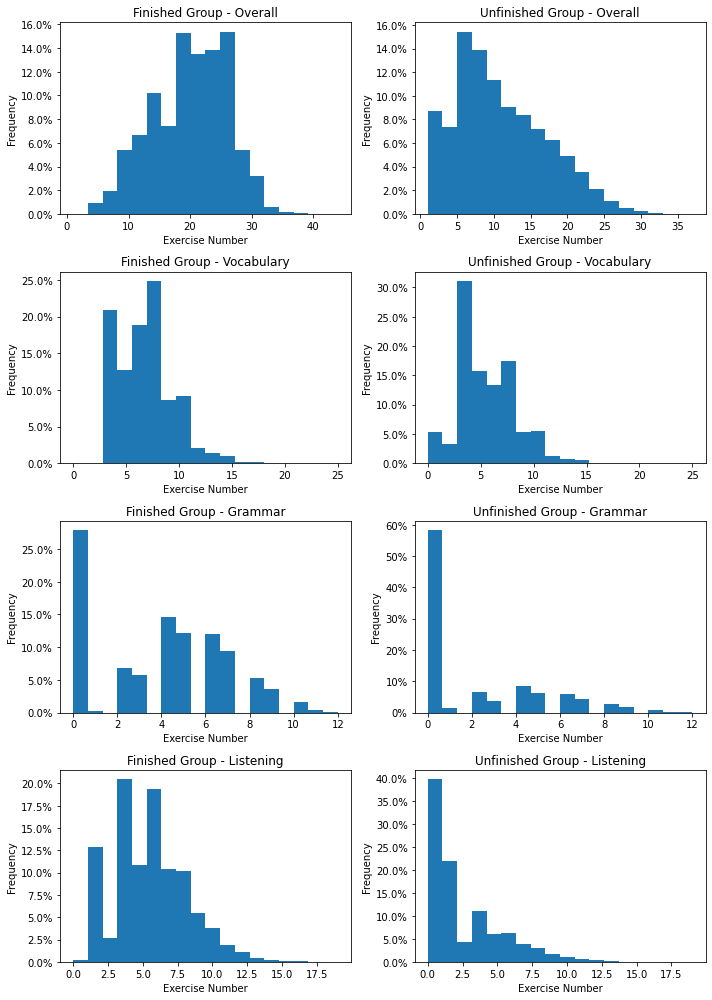

In [66]:
plt.figure(figsize=(10, 14))

plt.subplot(421)
plot_data = all_data[all_data.finished == 1.0]
plot_data.ttl_exe.plot(kind='hist', bins = len(list(set(plot_data))), weights=np.ones(len(plot_data)) / len(plot_data))
plt.title('Finished Group - Overall')
plt.xlabel('Exercise Number')
plt.ylabel('Frequency')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

plt.subplot(422)
plot_data = all_data[all_data.finished == 0.0]
plot_data.ttl_exe.plot(kind='hist', bins = len(list(set(plot_data))), weights=np.ones(len(plot_data)) / len(plot_data))
plt.title('Unfinished Group - Overall')
plt.xlabel('Exercise Number')
plt.ylabel('Frequency')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

plt.subplot(423)
plot_data = all_data[all_data.finished == 1.0]
plot_data.Vocabulary_ttl_exe.plot(kind='hist', bins = len(list(set(plot_data))), weights=np.ones(len(plot_data)) / len(plot_data))
plt.title('Finished Group - Vocabulary')
plt.xlabel('Exercise Number')
plt.ylabel('Frequency')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

plt.subplot(424)
plot_data = all_data[all_data.finished == 0.0]
plot_data.Vocabulary_ttl_exe.plot(kind='hist', bins = len(list(set(plot_data))), weights=np.ones(len(plot_data)) / len(plot_data))
plt.title('Unfinished Group - Vocabulary')
plt.xlabel('Exercise Number')
plt.ylabel('Frequency')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

plt.subplot(425)
plot_data = all_data[all_data.finished == 1.0]
plot_data.Grammar_ttl_exe.plot(kind='hist', bins = len(list(set(plot_data))), weights=np.ones(len(plot_data)) / len(plot_data))
plt.title('Finished Group - Grammar')
plt.xlabel('Exercise Number')
plt.ylabel('Frequency')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

plt.subplot(426)
plot_data = all_data[all_data.finished == 0.0]
plot_data.Grammar_ttl_exe.plot(kind='hist', bins = len(list(set(plot_data))), weights=np.ones(len(plot_data)) / len(plot_data))
plt.title('Unfinished Group - Grammar')
plt.xlabel('Exercise Number')
plt.ylabel('Frequency')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

plt.subplot(427)
plot_data = all_data[all_data.finished == 1.0]
plot_data.Listening_ttl_exe.plot(kind='hist', bins = len(list(set(plot_data))), weights=np.ones(len(plot_data)) / len(plot_data))
plt.title('Finished Group - Listening')
plt.xlabel('Exercise Number')
plt.ylabel('Frequency')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

plt.subplot(428)
plot_data = all_data[all_data.finished == 0.0]
plot_data.Listening_ttl_exe.plot(kind='hist', bins = len(list(set(plot_data))), weights=np.ones(len(plot_data)) / len(plot_data))
plt.title('Unfinished Group - Listening')
plt.xlabel('Exercise Number')
plt.ylabel('Frequency')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

plt.tight_layout()

In [12]:
uf_data = all_data[all_data.finished == 0.0]
uf_q = uf_data[['ttl_exe', 'Vocabulary_ttl_exe', 'Grammar_ttl_exe', 'Listening_ttl_exe']].quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
uf_q.rename(columns = {'ttl_exe' : "Total Exercise", 'Vocabulary_ttl_exe' : "Vocabulary", 'Grammar_ttl_exe' : "Grammar", 'Listening_ttl_exe' : "Listening"})

,Total Exercise,Vocabulary,Grammar,Listening
0.1,3.0,3.0,0.0,0.0
0.2,5.0,3.0,0.0,0.0
0.3,6.0,4.0,0.0,0.0
0.4,8.0,5.0,0.0,2.0
0.5,9.0,5.0,0.0,2.0
0.6,11.0,6.0,2.0,2.0
0.7,13.2,7.0,4.0,4.0
0.8,16.0,8.0,5.0,5.0
0.9,19.0,9.0,6.0,7.0
1.0,37.0,25.0,12.0,19.0


In [13]:
f_data = all_data[all_data.finished == 1.0]
f_q = f_data[['ttl_exe', 'Vocabulary_ttl_exe', 'Grammar_ttl_exe', 'Listening_ttl_exe']].quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
f_q.rename(columns = {'ttl_exe' : "Total Exercise", 'Vocabulary_ttl_exe' : "Vocabulary", 'Grammar_ttl_exe' : "Grammar", 'Listening_ttl_exe' : "Listening"})

,Total Exercise,Vocabulary,Grammar,Listening
0.1,11.0,4.0,0.0,2.0
0.2,14.0,4.0,0.0,4.0
0.3,17.0,5.0,2.0,4.0
0.4,19.0,6.0,3.0,5.0
0.5,21.0,6.0,4.0,6.0
0.6,22.0,7.0,5.0,6.0
0.7,24.0,8.0,6.0,7.0
0.8,25.0,9.0,7.0,8.0
0.9,27.0,10.0,8.0,9.0
1.0,44.0,25.0,12.0,19.0


# 聚类

已完成测试的用户

In [1]:
model_data = pd.read_csv('/home/tiger/archived-data/aeolus-data/20201209/19/33862511-定级测试信息利用-EO定级测试未完成用户分析-查询36.csv', encoding = 'gb18030')
# model_data.iloc[:, 1] = model_data.iloc[:, 1].fillna('unfilled')
model_data.head()

NameError: name 'pd' is not defined

In [12]:
len(model_data)

262002

In [13]:
# dummy = pd.get_dummies(model_data['edu'])
# dummy.head()
model_data.head()

,user_id,finished,milestone_id,ttl_exe,A0_V_correct_rate,A1L_V_correct_rate,A1M_V_correct_rate,A1H_V_correct_rate,A2L_V_correct_rate,A2M_V_correct_rate,...,A1H_L_correct_rate,A2L_L_correct_rate,A2M_L_correct_rate,A2H_L_correct_rate,B1L_L_correct_rate,B1M_L_correct_rate,B1H_L_correct_rate,B2_L_correct_rate,C1_L_correct_rate,C2_L_correct_rate
0,1.987533e+15,1.0,23010.0,20,NaN,1.0,NaN,NaN,1.0,NaN,...,1.0,1.0,0.0,0.0,NaN,NaN,0.5000,NaN,NaN,NaN
1,5.933752e+14,0.0,0.0,6,1.0,NaN,0.5,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5.449758e+14,1.0,23030.0,18,NaN,NaN,1.0,NaN,1.0,NaN,...,NaN,1.0,1.0,NaN,0.0,1.0,NaN,1.0,0.0,NaN
3,3.338723e+14,1.0,22020.0,24,1.0,NaN,0.0,1.0,NaN,1.0,...,0.0,1.0,NaN,NaN,NaN,NaN,0.6667,0.0,NaN,NaN
4,4.415254e+15,1.0,22020.0,20,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,1.0,1.0,NaN,NaN,0.0,0.0000,NaN,NaN,NaN


In [95]:
# new_data = pd.concat([model_data, dummy], axis = 1)
new_data = model_data
new_data.columns

Index(['user_id', 'finished', 'milestone_id', 'ttl_exe', 'A0_V_correct_rate',
       'A1L_V_correct_rate', 'A1M_V_correct_rate', 'A1H_V_correct_rate',
       'A2L_V_correct_rate', 'A2M_V_correct_rate', 'A2H_V_correct_rate',
       'B1L_V_correct_rate', 'B1M_V_correct_rate', 'B1H_V_correct_rate',
       'B2_V_correct_rate', 'C1_V_correct_rate', 'C2_V_correct_rate',
       'A0_G_correct_rate', 'A1L_G_correct_rate', 'A1M_G_correct_rate',
       'A1H_G_correct_rate', 'A2L_G_correct_rate', 'A2M_G_correct_rate',
       'A2H_G_correct_rate', 'B1L_G_correct_rate', 'B1M_G_correct_rate',
       'B1H_G_correct_rate', 'B2_G_correct_rate', 'C1_G_correct_rate',
       'C2_G_correct_rate', 'A0_L_correct_rate', 'A1L_L_correct_rate',
       'A1M_L_correct_rate', 'A1H_L_correct_rate', 'A2L_L_correct_rate',
       'A2M_L_correct_rate', 'A2H_L_correct_rate', 'B1L_L_correct_rate',
       'B1M_L_correct_rate', 'B1H_L_correct_rate', 'B2_L_correct_rate',
       'C1_L_correct_rate', 'C2_L_correct_rate'],
     

In [96]:
f_data = new_data[new_data.finished == 1.0]

f_data.iloc[:, np.r_[4:43]] = f_data.iloc[:, np.r_[4:43]].fillna(-1)
f_data.iloc[:, np.r_[4:43]].head()

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1717: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, v)


,A0_V_correct_rate,A1L_V_correct_rate,A1M_V_correct_rate,A1H_V_correct_rate,A2L_V_correct_rate,A2M_V_correct_rate,A2H_V_correct_rate,B1L_V_correct_rate,B1M_V_correct_rate,B1H_V_correct_rate,...,A1H_L_correct_rate,A2L_L_correct_rate,A2M_L_correct_rate,A2H_L_correct_rate,B1L_L_correct_rate,B1M_L_correct_rate,B1H_L_correct_rate,B2_L_correct_rate,C1_L_correct_rate,C2_L_correct_rate
0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0,...,1.0,1.0,0.0,0.0,-1.0,-1.0,0.5000,-1.0,-1.0,-1.0
2,-1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,-1.0,...,-1.0,1.0,1.0,-1.0,0.0,1.0,-1.0000,1.0,0.0,-1.0
3,1.0,-1.0,0.0,1.0,-1.0,1.0,0.0,0.0,0.0,-1.0,...,0.0,1.0,-1.0,-1.0,-1.0,-1.0,0.6667,0.0,-1.0,-1.0
4,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,0.0,1.0,0.0,...,-1.0,1.0,1.0,-1.0,-1.0,0.0,0.0000,-1.0,-1.0,-1.0
5,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,0.5,-1.0,0.0,...,0.0,0.5,1.0,-1.0,-1.0,0.0,-1.0000,-1.0,-1.0,-1.0


In [97]:
x = f_data.iloc[:, np.r_[4:43]]
y = f_data[['milestone_id']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=11)

KNN

In [52]:
knn = neighbors.KNeighborsClassifier(algorithm='kd_tree',  n_neighbors = 15)
knn.fit(x_train, y_train)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='kd_tree', n_neighbors=15)

In [106]:
start = time.time()
y_pred = knn.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
end = time.time()
print((end - start)/len(y_pred))

Accuracy: 0.6868570298074387
0.008572979114578255


Linear Regression

In [98]:
lm = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr').fit(x_train, y_train)

start = time.time()
y_pred = lm.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
end = time.time()
print((end - start)/len(y_pred))

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter)

Accuracy: 0.6508342126088104
3.851032357705171e-07


In [99]:
# save parameter
coef = pd.DataFrame(lm.coef_, columns = x_test.columns)
intercept = pd.DataFrame(lm.intercept_, columns = ['intercept'])

parameter = pd.concat([intercept, coef], axis=1)
parameter.to_csv(r'./logistic_parameter.csv', encoding='utf_8_sig')

In [80]:
# lm.predict(x_test.head(1))

In [100]:
# save test data
x_test.to_csv(r'./x_test.csv', encoding='utf_8_sig')

In [101]:
# save vallidate data

x_test['new_index'] = range(0, len(x_test))
x_test.index = x_test['new_index'] 

y_pred = pd.DataFrame(y_pred)
y_pred.columns =['new_mile_stone'] 

validate_data = pd.concat([x_test, y_pred], axis=1)
validate_data.to_csv(r'./logistic_model_validate.csv', encoding='utf_8_sig')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [91]:
unique, counts = np.unique(y_test, return_counts=True)
dict(zip(unique, counts))

{21010.0: 22213,
 21020.0: 6797,
 21030.0: 4557,
 22010.0: 7143,
 22020.0: 4079,
 22030.0: 3414,
 23010.0: 8549,
 23020.0: 23,
 23030.0: 2318,
 24000.0: 1332,
 25000.0: 212,
 26000.0: 19}

In [137]:
22406/len(y_test)

0.3693946188340807

未完成测试的用户

In [17]:
uf_data = model_data[model_data.finished == 0.0]
uf_data[uf_data.columns[4:40]] = uf_data[uf_data.columns[4:40]].fillna(-1)

x_train = f_data[f_data.columns[4:40]]
y_train = f_data[['milestone_id']]

x_test = uf_data[uf_data.columns[4:40]]
y_test = uf_data[['milestone_id']]


knn = neighbors.KNeighborsClassifier(algorithm='kd_tree',  n_neighbors = 15)
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if sys.path[0] == '':


In [18]:
y_pred

array([22030., 21010., 21010., ..., 22030., 21010., 21020.])

In [19]:
len(y_pred)

59817

In [20]:
unique, counts = np.unique(y_pred, return_counts=True)
dict(zip(unique, counts))

{21010.0: 42034,
 21020.0: 4895,
 21030.0: 1808,
 22010.0: 2197,
 22020.0: 867,
 22030.0: 549,
 23010.0: 5516,
 23030.0: 1128,
 24000.0: 786,
 25000.0: 37}

In [21]:
uf_data.head()

,user_id,finished,milestone_id,ttl_exe,A0_V_correct_rate,A1L_V_correct_rate,A1M_V_correct_rate,A1H_V_correct_rate,A2L_V_correct_rate,A2M_V_correct_rate,...,A1H_L_correct_rate,A2L_L_correct_rate,A2M_L_correct_rate,A2H_L_correct_rate,B1L_L_correct_rate,B1M_L_correct_rate,B1H_L_correct_rate,B2_L_correct_rate,C1_L_correct_rate,C2_L_correct_rate
6,3.162560e+14,0.0,0.0,22,-1.0000,1.0000,1.0,-1.0,0.5,-1.0,...,-1.0,-1.0,1.0,1.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0
13,3.078230e+15,0.0,0.0,2,1.0000,-1.0000,0.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
15,5.713519e+14,0.0,0.0,8,1.0000,0.0000,0.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
16,2.436146e+15,0.0,0.0,7,-1.0000,1.0000,-1.0,1.0,0.0,0.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
27,7.736702e+14,0.0,0.0,9,0.6667,0.3333,-1.0,-1.0,-1.0,0.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [24]:
df1 = uf_data[["user_id", "ttl_exe"]]
df1['new_index'] = range(0, len(df1))
df1.index = df1['new_index'] 
df1

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,user_id,ttl_exe,new_index
new_index,,,
0,3.162560e+14,22,0
1,3.078230e+15,2,1
2,5.713519e+14,8,2
3,2.436146e+15,7,3
4,7.736702e+14,9,4
...,...,...,...
59812,1.969931e+15,12,59812
59813,4.415243e+15,14,59813
59814,6.681046e+14,19,59814


In [25]:
df2 = pd.DataFrame(y_pred)
df2.columns =['new_mile_stone'] 
df2

,new_mile_stone
0,22030.0
1,21010.0
2,21010.0
3,21010.0
4,21010.0
...,...
59812,21020.0
59813,23010.0
59814,22030.0
59815,21010.0


In [26]:
new_df = pd.concat([df1, df2], axis=1)
new_df.head()

,user_id,ttl_exe,new_index,new_mile_stone
0,3.162560e+14,22,0,22030.0
1,3.078230e+15,2,1,21010.0
2,5.713519e+14,8,2,21010.0
3,2.436146e+15,7,3,21010.0
4,7.736702e+14,9,4,21010.0


未完成测试用户答题偏向性

In [30]:
all_data[all_data.finished == 0.0].head()

,user_id,test_id,finished,milestone_id,gradinglevel,grammarlevel,listeninglevel,vocabularylevel,Listening_ttl_exe,Grammar_ttl_exe,Vocabulary_ttl_exe,Oral_ttl_exe,Listening_correct_exe,Grammar_correct_exe,Vocabulary_correct_exe,Oral_correct_exe,ttl_exe,rk
1,2.796765e+15,519284570181402624,0.0,0.0,NaN,NaN,NaN,NaN,0,4,13,0,0,2,10,0,17,1
2,7.736847e+14,541030533808418816,0.0,0.0,NaN,NaN,NaN,NaN,0,0,2,0,0,0,1,0,2,1
5,3.746755e+15,531858784214355968,0.0,0.0,NaN,NaN,NaN,NaN,1,0,3,0,0,0,0,0,4,1
12,2.849552e+15,530579908880293888,0.0,0.0,NaN,NaN,NaN,NaN,0,0,4,0,0,0,2,0,4,1
14,6.153437e+14,529480529582809088,0.0,0.0,NaN,NaN,NaN,NaN,4,9,11,0,2,6,7,0,24,1


In [31]:
exe_num = pd.merge(all_data[all_data.finished == 0.0], new_df, on='user_id')

In [32]:
len(exe_num)

59817

In [33]:
exe_num.head()

,user_id,test_id,finished,milestone_id,gradinglevel,grammarlevel,listeninglevel,vocabularylevel,Listening_ttl_exe,Grammar_ttl_exe,...,Oral_ttl_exe,Listening_correct_exe,Grammar_correct_exe,Vocabulary_correct_exe,Oral_correct_exe,ttl_exe_x,rk,ttl_exe_y,new_index,new_mile_stone
0,2.796765e+15,519284570181402624,0.0,0.0,NaN,NaN,NaN,NaN,0,4,...,0,0,2,10,0,17,1,17,38974,21020.0
1,7.736847e+14,541030533808418816,0.0,0.0,NaN,NaN,NaN,NaN,0,0,...,0,0,0,1,0,2,1,2,38975,21010.0
2,3.746755e+15,531858784214355968,0.0,0.0,NaN,NaN,NaN,NaN,1,0,...,0,0,0,0,0,4,1,4,38971,21010.0
3,2.849552e+15,530579908880293888,0.0,0.0,NaN,NaN,NaN,NaN,0,0,...,0,0,0,2,0,4,1,4,38970,21010.0
4,6.153437e+14,529480529582809088,0.0,0.0,NaN,NaN,NaN,NaN,4,9,...,0,2,6,7,0,24,1,24,38963,22020.0


In [36]:
quantile_data = exe_num[['ttl_exe_x', 'Vocabulary_ttl_exe', 'Grammar_ttl_exe', 'Listening_ttl_exe']]
uf_q = quantile_data.quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
uf_q.rename(columns = {'ttl_exe' : "Total Exercise", 'Vocabulary_ttl_exe' : "Vocabulary", 'Grammar_ttl_exe' : "Grammar", 'Listening_ttl_exe' : "Listening"})

,ttl_exe_x,Vocabulary,Grammar,Listening
0.1,3.0,3.0,0.0,0.0
0.2,5.0,3.0,0.0,0.0
0.3,6.0,4.0,0.0,0.0
0.4,8.0,5.0,0.0,2.0
0.5,9.0,5.0,0.0,2.0
0.6,11.0,6.0,2.0,2.0
0.7,13.2,7.0,4.0,4.0
0.8,16.0,8.0,5.0,5.0
0.9,19.0,9.0,6.0,7.0
1.0,37.0,25.0,12.0,19.0


In [53]:
quantile_data = exe_num.loc[exe_num.new_mile_stone == 21010.0, ['ttl_exe_x', 'Vocabulary_ttl_exe', 'Grammar_ttl_exe', 'Listening_ttl_exe']]
uf_q = quantile_data.quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
uf_q.rename(columns = {'ttl_exe_x' : "Total Exercise", 'Vocabulary_ttl_exe' : "Vocabulary", 'Grammar_ttl_exe' : "Grammar", 'Listening_ttl_exe' : "Listening"})

,Total Exercise,Vocabulary,Grammar,Listening
0.1,2.0,2.0,0.0,0.0
0.2,4.0,3.0,0.0,0.0
0.3,5.0,3.0,0.0,0.0
0.4,6.0,4.0,0.0,1.0
0.5,7.0,4.0,0.0,2.0
0.6,8.0,5.0,0.0,2.0
0.7,9.0,5.0,0.0,2.0
0.8,11.0,6.0,1.0,4.0
0.9,14.0,7.0,4.0,5.0
1.0,29.0,18.0,12.0,17.0


In [51]:
type(uf_q)

pandas.core.frame.DataFrame

In [54]:
quantile_data = exe_num.loc[exe_num.new_mile_stone == 21020.0, ['ttl_exe_x', 'Vocabulary_ttl_exe', 'Grammar_ttl_exe', 'Listening_ttl_exe']]
uf_q = quantile_data.quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
uf_q.rename(columns = {'ttl_exe_x' : "Total Exercise", 'Vocabulary_ttl_exe' : "Vocabulary", 'Grammar_ttl_exe' : "Grammar", 'Listening_ttl_exe' : "Listening"})

,Total Exercise,Vocabulary,Grammar,Listening
0.1,10.0,4.0,1.0,0.0
0.2,12.0,5.0,2.0,0.0
0.3,13.0,5.0,3.0,1.0
0.4,14.0,6.0,4.0,3.0
0.5,15.0,7.0,5.0,4.0
0.6,16.0,7.0,5.0,5.0
0.7,18.0,8.0,6.0,6.0
0.8,19.0,9.0,7.0,7.0
0.9,21.0,10.0,8.0,9.0
1.0,32.0,18.0,12.0,19.0


In [55]:
quantile_data = exe_num.loc[exe_num.new_mile_stone == 21030.0, ['ttl_exe_x', 'Vocabulary_ttl_exe', 'Grammar_ttl_exe', 'Listening_ttl_exe']]
uf_q = quantile_data.quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
uf_q.rename(columns = {'ttl_exe_x' : "Total Exercise", 'Vocabulary_ttl_exe' : "Vocabulary", 'Grammar_ttl_exe' : "Grammar", 'Listening_ttl_exe' : "Listening"})

,Total Exercise,Vocabulary,Grammar,Listening
0.1,13.0,5.0,4.0,0.0
0.2,14.0,6.0,5.0,0.0
0.3,16.0,6.0,5.0,1.0
0.4,17.0,7.0,6.0,2.0
0.5,18.0,8.0,6.0,4.0
0.6,19.0,8.0,7.0,5.0
0.7,20.0,9.0,8.0,6.0
0.8,22.0,10.0,8.0,7.0
0.9,24.0,11.0,9.0,8.0
1.0,34.0,18.0,12.0,14.0


In [56]:
quantile_data = exe_num.loc[exe_num.new_mile_stone == 22010.0, ['ttl_exe_x', 'Vocabulary_ttl_exe', 'Grammar_ttl_exe', 'Listening_ttl_exe']]
uf_q = quantile_data.quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
uf_q.rename(columns = {'ttl_exe_x' : "Total Exercise", 'Vocabulary_ttl_exe' : "Vocabulary", 'Grammar_ttl_exe' : "Grammar", 'Listening_ttl_exe' : "Listening"})

,Total Exercise,Vocabulary,Grammar,Listening
0.1,15.0,4.0,4.0,3.0
0.2,16.0,5.0,4.0,4.0
0.3,18.0,6.0,5.0,5.0
0.4,19.0,7.0,5.0,6.0
0.5,20.0,7.0,6.0,6.0
0.6,21.0,8.0,6.0,7.0
0.7,22.0,8.0,7.0,8.0
0.8,23.0,9.0,8.0,9.0
0.9,25.0,10.0,8.0,10.0
1.0,35.0,17.0,12.0,18.0


In [57]:
quantile_data = exe_num.loc[exe_num.new_mile_stone == 22020.0, ['ttl_exe_x', 'Vocabulary_ttl_exe', 'Grammar_ttl_exe', 'Listening_ttl_exe']]
uf_q = quantile_data.quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
uf_q.rename(columns = {'ttl_exe_x' : "Total Exercise", 'Vocabulary_ttl_exe' : "Vocabulary", 'Grammar_ttl_exe' : "Grammar", 'Listening_ttl_exe' : "Listening"})

,Total Exercise,Vocabulary,Grammar,Listening
0.1,14.0,5.0,4.0,1.0
0.2,16.0,6.0,4.0,2.0
0.3,17.0,6.0,4.8,3.0
0.4,18.0,7.0,5.0,4.0
0.5,19.0,7.0,6.0,5.0
0.6,20.0,8.0,6.0,6.0
0.7,21.0,9.0,7.0,6.0
0.8,23.0,10.0,8.0,8.0
0.9,25.0,12.0,9.0,9.0
1.0,35.0,18.0,12.0,16.0


In [58]:
quantile_data = exe_num.loc[exe_num.new_mile_stone == 22030.0, ['ttl_exe_x', 'Vocabulary_ttl_exe', 'Grammar_ttl_exe', 'Listening_ttl_exe']]
uf_q = quantile_data.quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
uf_q.rename(columns = {'ttl_exe_x' : "Total Exercise", 'Vocabulary_ttl_exe' : "Vocabulary", 'Grammar_ttl_exe' : "Grammar", 'Listening_ttl_exe' : "Listening"})

,Total Exercise,Vocabulary,Grammar,Listening
0.1,14.0,5.0,4.0,1.0
0.2,16.0,5.0,4.0,2.6
0.3,17.0,6.0,5.0,4.0
0.4,18.0,7.0,6.0,4.0
0.5,19.0,7.0,6.0,5.0
0.6,20.0,8.0,6.0,6.0
0.7,21.0,9.0,7.0,6.0
0.8,22.4,9.0,8.0,8.0
0.9,25.0,10.0,9.0,9.0
1.0,36.0,17.0,11.0,14.0


In [59]:
quantile_data = exe_num.loc[exe_num.new_mile_stone == 23010.0, ['ttl_exe_x', 'Vocabulary_ttl_exe', 'Grammar_ttl_exe', 'Listening_ttl_exe']]
uf_q = quantile_data.quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
uf_q.rename(columns = {'ttl_exe_x' : "Total Exercise", 'Vocabulary_ttl_exe' : "Vocabulary", 'Grammar_ttl_exe' : "Grammar", 'Listening_ttl_exe' : "Listening"})

,Total Exercise,Vocabulary,Grammar,Listening
0.1,7.0,5.0,0.0,0.0
0.2,10.0,6.0,3.0,0.0
0.3,13.0,7.0,4.0,0.0
0.4,14.0,7.0,4.0,0.0
0.5,16.0,8.0,5.0,2.0
0.6,17.0,8.0,5.0,4.0
0.7,19.0,9.0,6.0,5.0
0.8,21.0,10.0,6.0,6.0
0.9,23.0,11.0,7.0,8.0
1.0,37.0,25.0,11.0,16.0


In [60]:
quantile_data = exe_num.loc[exe_num.new_mile_stone == 23030.0, ['ttl_exe_x', 'Vocabulary_ttl_exe', 'Grammar_ttl_exe', 'Listening_ttl_exe']]
uf_q = quantile_data.quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
uf_q.rename(columns = {'ttl_exe_x' : "Total Exercise", 'Vocabulary_ttl_exe' : "Vocabulary", 'Grammar_ttl_exe' : "Grammar", 'Listening_ttl_exe' : "Listening"})

,Total Exercise,Vocabulary,Grammar,Listening
0.1,7.0,6.0,0.0,0.0
0.2,11.0,7.0,2.0,0.0
0.3,13.0,7.0,3.0,0.0
0.4,14.0,8.0,3.0,0.0
0.5,16.0,9.0,4.0,1.0
0.6,17.0,9.0,5.0,2.0
0.7,19.0,10.0,5.0,4.0
0.8,20.0,11.0,6.0,6.0
0.9,23.0,12.0,7.0,7.0
1.0,33.0,22.0,11.0,15.0


In [61]:
quantile_data = exe_num.loc[exe_num.new_mile_stone == 24000.0, ['ttl_exe_x', 'Vocabulary_ttl_exe', 'Grammar_ttl_exe', 'Listening_ttl_exe']]
uf_q = quantile_data.quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
uf_q.rename(columns = {'ttl_exe_x' : "Total Exercise", 'Vocabulary_ttl_exe' : "Vocabulary", 'Grammar_ttl_exe' : "Grammar", 'Listening_ttl_exe' : "Listening"})

,Total Exercise,Vocabulary,Grammar,Listening
0.1,10.0,5.0,3.0,0.0
0.2,12.0,6.0,3.0,0.0
0.3,13.0,7.0,4.0,0.0
0.4,15.0,7.0,4.0,1.0
0.5,16.0,8.0,5.0,3.0
0.6,17.0,9.0,5.0,4.0
0.7,18.0,9.0,5.0,5.0
0.8,20.0,10.0,6.0,6.0
0.9,22.0,11.0,7.0,7.0
1.0,29.0,17.0,10.0,12.0


In [62]:
quantile_data = exe_num.loc[exe_num.new_mile_stone == 25000.0, ['ttl_exe_x', 'Vocabulary_ttl_exe', 'Grammar_ttl_exe', 'Listening_ttl_exe']]
uf_q = quantile_data.quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
uf_q.rename(columns = {'ttl_exe_x' : "Total Exercise", 'Vocabulary_ttl_exe' : "Vocabulary", 'Grammar_ttl_exe' : "Grammar", 'Listening_ttl_exe' : "Listening"})

,Total Exercise,Vocabulary,Grammar,Listening
0.1,10.0,6.0,3.0,0.0
0.2,11.2,6.0,3.0,0.0
0.3,12.0,6.0,3.0,0.8
0.4,13.0,7.0,3.0,1.0
0.5,14.0,8.0,4.0,3.0
0.6,15.0,8.0,5.0,3.0
0.7,17.0,9.0,5.0,4.0
0.8,18.0,9.0,5.0,4.8
0.9,20.4,9.0,7.0,6.4
1.0,29.0,15.0,10.0,9.0


# 新等级和默认等级对比

In [83]:
def_user_all = fdk_user[(fdk_user.is_default_level == 1.0)]
def_user_all.loc[(def_user_all['feedback_answer_new'] == "401"), 'feedback'] = '太难了'
def_user_all.loc[(def_user_all['feedback_answer_new'] == "402"), 'feedback'] = '太简单了'
def_user_all.groupby(['feedback']).size()

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


feedback
太简单了     588
太难了     1178
dtype: int64

In [72]:
new_df.head()

,user_id,ttl_exe,new_index,new_mile_stone
0,3.162560e+14,22,0,22030.0
1,3.078230e+15,2,1,21010.0
2,5.713519e+14,8,2,21010.0
3,2.436146e+15,7,3,21010.0
4,7.736702e+14,9,4,21010.0


In [73]:
result = pd.merge(def_user_all, new_df, 'right' , on ='user_id')
result.head()

,user_id,feedback_answer_new,is_default_level,lesson_level,role,feedback,ttl_exe,new_index,new_mile_stone
0,316256040782984,NaN,NaN,NaN,NaN,NaN,22,0,22030.0
1,3078230060071912,NaN,NaN,NaN,NaN,NaN,2,1,21010.0
2,571351855006936,NaN,NaN,NaN,NaN,NaN,8,2,21010.0
3,2436145841178254,NaN,NaN,NaN,NaN,NaN,7,3,21010.0
4,773670205922286,NaN,NaN,NaN,NaN,NaN,9,4,21010.0


In [76]:
len(new_df)

59817

In [77]:
len(result)

59831

In [84]:
result.groupby(['new_mile_stone' ,'feedback']).size()

new_mile_stone  feedback
21010.0         太简单了         75
                太难了         665
21020.0         太简单了         16
                太难了          26
21030.0         太简单了          8
                太难了           8
22010.0         太简单了          5
                太难了           2
22020.0         太简单了          1
                太难了           3
22030.0         太简单了          2
23010.0         太简单了         32
                太难了           6
23030.0         太简单了         19
                太难了           1
24000.0         太简单了          1
dtype: int64

In [86]:
(159+711)/( 59817)

0.014544360298911681

In [87]:
(159)/(59817)

0.0026581072270424797

In [88]:
(711)/(59817)

0.011886253071869201

In [89]:
(59817 - 711-159)/(59817)

0.9854556397010883

In [228]:
result.to_csv(r'./mile_stone_result.csv', encoding='utf_8_sig')

# 完成测试用户小项得分 vs 用户反馈

In [210]:
finish_user.head()

,user_id,feedback_answer_new,is_default_level,lesson_level,feedback
4,3025484090719454,401,0.0,A1初,太难了
7,4362485978366104,401,0.0,A1初,太难了
16,3078254632895918,402,0.0,A2中,太简单了
19,2919926398466446,401,0.0,B1高,太难了
21,1776430362134168,402,0.0,A2初,太简单了


In [218]:
len(finish_user)

5921

In [213]:
f_data = all_data[all_data.finished == 1.0]
f_data_level = f_data[["user_id", "milestone_id", "gradinglevel", "grammarlevel", "listeninglevel", "vocabularylevel"]]
f_data_level.head()

,user_id,milestone_id,gradinglevel,grammarlevel,listeninglevel,vocabularylevel
0,2.427354e+15,23030.0,5.0,5.0,5.0,4.0
3,8.968024e+14,21020.0,9.0,2.0,2.0,2.0
4,1.931466e+14,22020.0,12.0,2.0,3.0,4.0
6,1.547718e+15,21030.0,10.0,2.0,2.0,3.0
7,2.744008e+15,22010.0,11.0,3.0,3.0,2.0


In [217]:
len(f_data_level)

202184

In [219]:
result_f = pd.merge(finish_user, f_data_level, how='right', on='user_id')
result_f.head()

,user_id,feedback_answer_new,is_default_level,lesson_level,feedback,milestone_id,gradinglevel,grammarlevel,listeninglevel,vocabularylevel
0,2427353779934750,NaN,NaN,NaN,NaN,23030.0,5.0,5.0,5.0,4.0
1,896802366438471,NaN,NaN,NaN,NaN,21020.0,9.0,2.0,2.0,2.0
2,193146632282974,NaN,NaN,NaN,NaN,22020.0,12.0,2.0,3.0,4.0
3,1547718112841902,NaN,NaN,NaN,NaN,21030.0,10.0,2.0,2.0,3.0
4,2744008025062504,402,0.0,A2初,太简单了,22010.0,11.0,3.0,3.0,2.0


In [220]:
len(result_f)

202232

In [221]:
result_f.to_csv(r'./grading_result.csv', encoding='utf_8_sig')

In [1]:
14759/60/60

4.099722222222222